In [1]:
import pandas as pd

data = pd.read_csv("../datasets/market_insights_overview_all.csv")
data["date"] = pd.to_datetime(data["date"])
# data = pd.read_csv("../datasets/market_insights_overview_5p.csv")



In [2]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2251 entries, 0 to 2250
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               2251 non-null   int64         
 1   product_id       2251 non-null   int64         
 2   manufacturer_id  2251 non-null   int64         
 3   cat_id           2251 non-null   int64         
 4   root_cat_id      2251 non-null   int64         
 5   date             2251 non-null   datetime64[ns]
 6   hits             2251 non-null   int64         
 7   clicks           2251 non-null   int64         
 8   last_modified    2251 non-null   object        
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 158.4+ KB


In [3]:
categories = pd.read_csv("../datasets/solr_categories_all_16_09_2021.csv")
categories.head()

parent      title_no internal_doc_type  \
0                          Sofa  2-seter sofa          category   
1                          Sofa  3-seter sofa          category   
2                 Foto og video    360-kamera          category   
3              TV og hjemmekino    3D-briller          category   
4  Skriver, skanner og tilbehør    3D-printer          category   

                                           image_url    description  \
0       /3135/3135859/jot_1603574-03_Fs.154x75!m.png  181 produkter   
1       /3135/3135481/jot_1514401-01_Fs.168x75!m.png  181 produkter   
2                 /2529/2529818/original.98x75!m.jpg   19 produkter   
3              /1335/1335677/3d-briller.148x75!m.jpg    6 produkter   
4  /1194/1194469/bfb-3dtouch-smoke-3d-printer_0.6...   57 produkter   

          title title_phonetic                       url      tags  \
0  2-seter sofa   2-seter sofa  /kategorier/2-seter-sofa    filter   
1  3-seter sofa   3-seter sofa  /kategorier/3-seter-sofa    filter   
2    360-kamera     360-kamera    /kategorier/360-kamera  products   
3    3D-briller     3D-briller    /kategorier/3d-briller  products   
4    3D-printer     3D-printer    /kategorier/3d-printer  products   

                                           path  ...  internal_doc_id  \
0  Hjem og husholdning>Møbler>Sofa>2-seter sofa  ...            13084   
1  Hjem og husholdning>Møbler>Sofa>3-seter sofa  ...            13085   
2                      Foto og video>360-kamera  ...            11874   
3      Lyd og bilde>TV og hjemmekino>3D-briller  ...            11030   
4  Data>Skriver, skanner og tilbehør>3D-printer  ...            11091   

   popularity                 root  \
0        1192  Hjem og husholdning   
1        1192  Hjem og husholdning   
2        1406        Foto og video   
3        1007         Lyd og bilde   
4        1729                 Data   

                                             alias title_edge_ngram     id  \
0                                              NaN     2-seter sofa  13084   
1                                              NaN     3-seter sofa  13085   
2                      360-graderskamera,vr-kamera       360-kamera  11874   
3                                              NaN       3D-briller  11030   
4  3d printere,3d-skriver,printer,skriver,skrivere       3D-printer  11091   

                                          alias_no  adult  \
0                                              NaN  False   
1                                              NaN  False   
2                      360-graderskamera,vr-kamera  False   
3                                              NaN  False   
4  3d printere,printer,skriver,skrivere,3d-skriver  False   

              last_modified                             parents  
0  2021-09-16T03:02:23.579Z     Hjem og husholdning,Møbler,Sofa  
1  2021-09-16T03:02:23.579Z     Hjem og husholdning,Møbler,Sofa  
2  2021-09-16T03:02:23.579Z                       Foto og video  
3  2021-09-16T03:02:23.579Z       Lyd og bilde,TV og hjemmekino  
4  2021-09-16T03:02:23.579Z  Data,Skriver\, skanner og tilbehør  

[5 rows x 21 columns]

In [4]:
# Join market_insight table with category names
category_names = categories[[ "internal_doc_id", "title"]]

data_joined = pd.merge(data, category_names, how="left", left_on=["cat_id"], right_on=["internal_doc_id"])
data_joined = data_joined.rename(columns={"title": "cat_name"})
data_joined.head()

id  product_id  manufacturer_id  cat_id  root_cat_id       date  \
0  35237122      211757              722   11573          101 2021-09-08   
1  35149255      211757              722   11573          101 2021-09-06   
2  35080572      211757              722   11573          101 2021-09-04   
3  35042861      211757              722   11573          101 2021-09-03   
4  34817620      211757              722   11573          101 2021-08-27   

   hits  clicks               last_modified  internal_doc_id         cat_name  
0     1       1  2021-09-09 05:35:12.354425            11573  Nettverkskabler  
1     2       0  2021-09-07 05:30:06.734081            11573  Nettverkskabler  
2     2       0  2021-09-05 05:20:05.084482            11573  Nettverkskabler  
3     5       2  2021-09-04 05:10:35.809476            11573  Nettverkskabler  
4     4       0  2021-08-28 05:11:36.199285            11573  Nettverkskabler

In [5]:
print(category_names["title"])
categories_file = open("categories.txt", "w")
for cat_line in category_names["title"]:
    categories_file.write(cat_line)
    categories_file.write("\n")
categories_file.close()

0           2-seter sofa
1           3-seter sofa
2             360-kamera
3             3D-briller
4             3D-printer
              ...       
2123     Øyenbrynsprimer
2124    Øyenbrynstrimmer
2125          Øyenskygge
2126      Øyenskyggekost
2127                Øyne
Name: title, Length: 2128, dtype: object


In [6]:
import matplotlib.pyplot as plt
import numpy as np
# Set pandas to use decimal insteaf of scientific e^x notaion
pd.set_option("display.float_format", lambda x: "%.0f" % x)

interesting_data = data_joined[["date", "hits", "clicks", "product_id", "cat_id", "cat_name" ]]

print(f"Unique products: {data['product_id'].nunique()}")
print(f"Unique categories: {data['cat_id'].nunique()}")


grouped = interesting_data.groupby(["cat_id", "date"], as_index=False).sum()

# Filter away early 2018 data as it seems to contain errors
grouped = grouped.loc[grouped['date'] > '2018-12-01']

print(grouped)
grouped.describe()

Unique products: 5
Unique categories: 4
      cat_id       date  hits  clicks  product_id
1         33 2019-01-29     1       0      311569
2         33 2019-01-30     1       0      311569
3         33 2019-02-10     1       1      311569
4         33 2019-05-08     1       0      311569
5         33 2019-07-02     4       0      311569
...      ...        ...   ...     ...         ...
1644   11573 2021-09-01     2       0      213048
1645   11573 2021-09-03    10       4      424805
1646   11573 2021-09-04     3       0      424805
1647   11573 2021-09-06     4       0      424805
1648   11573 2021-09-08     1       1      211757

[1558 rows x 5 columns]


cat_id  hits  clicks  product_id
count    1558  1558    1558        1558
mean    11150     4       1      353870
std      1552     4       2       98134
min        33     0       0      211757
25%     11037     1       0      241400
50%     11573     3       0      424805
75%     11573     5       2      434923
max     11573    57      49      434923

I perioden august 2018 til perioden august 2021 ble det registrert 1320 unike kategorier.
Et nevralnett med 1320 i bredde er litt stort kanskje? Det vil også låse modellen til X antall kategorier.
Dette er et argument for å se på hver kategori inviduelt og ha en egen modell per kategori.

Ulempen med det igjen er at det blir veldig mange modeller...

cat_id        393
date          393
hits          393
clicks        393
product_id    393
dtype: int64


array([[<AxesSubplot:title={'center':'hits'}>,
        <AxesSubplot:title={'center':'clicks'}>]], dtype=object)

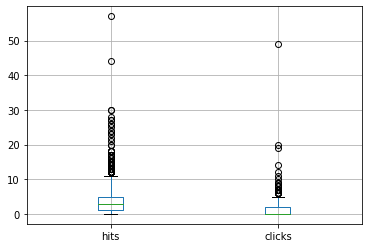

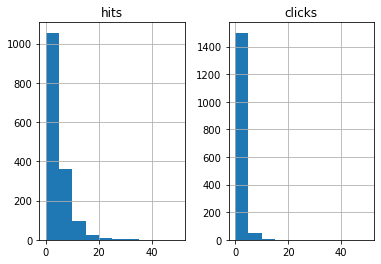

In [7]:
print(grouped[grouped["hits"] == 1].count())
grouped.boxplot(column=["hits", "clicks"])
grouped.hist(column=["hits", "clicks"], range=(0, 50))

Vi ser at antall klikk for en kategori per dag avtar hurtig! Kan den følge en kjent sannsynlighet distribusjon?
F.eks: pareto distribution?

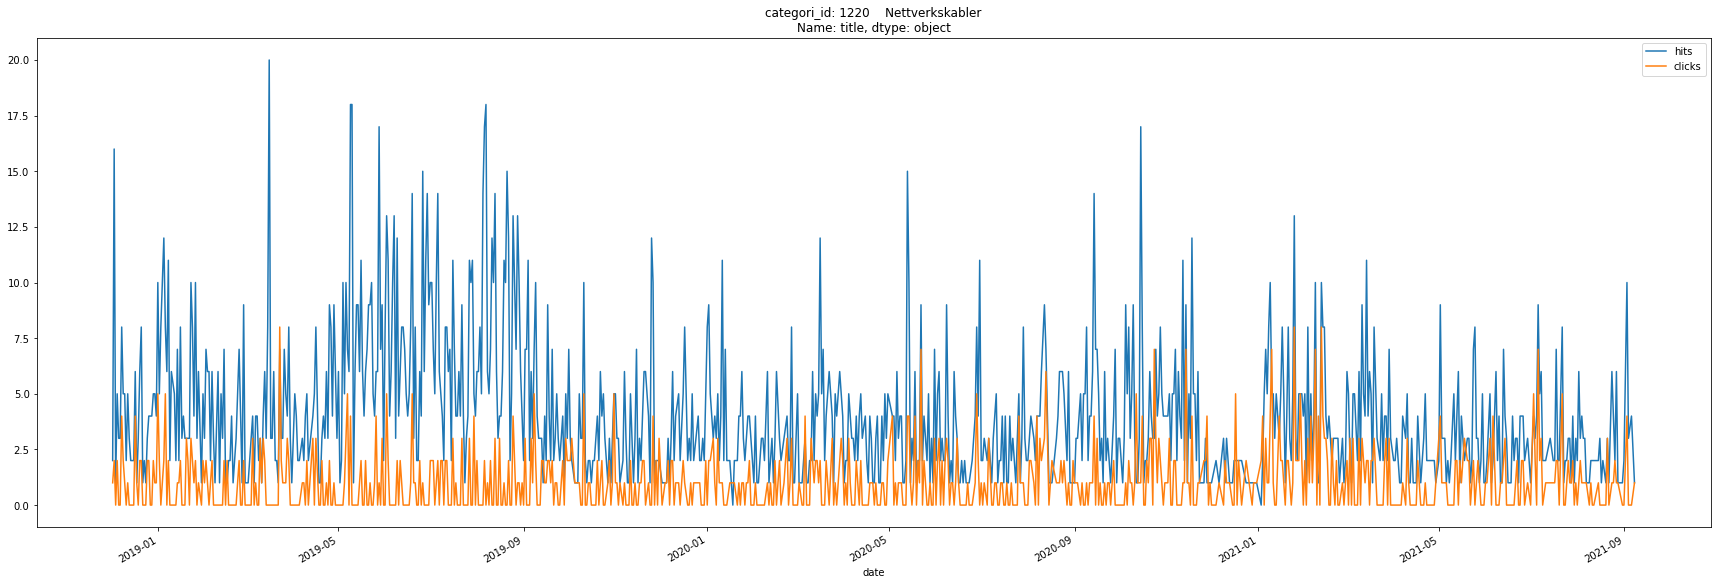

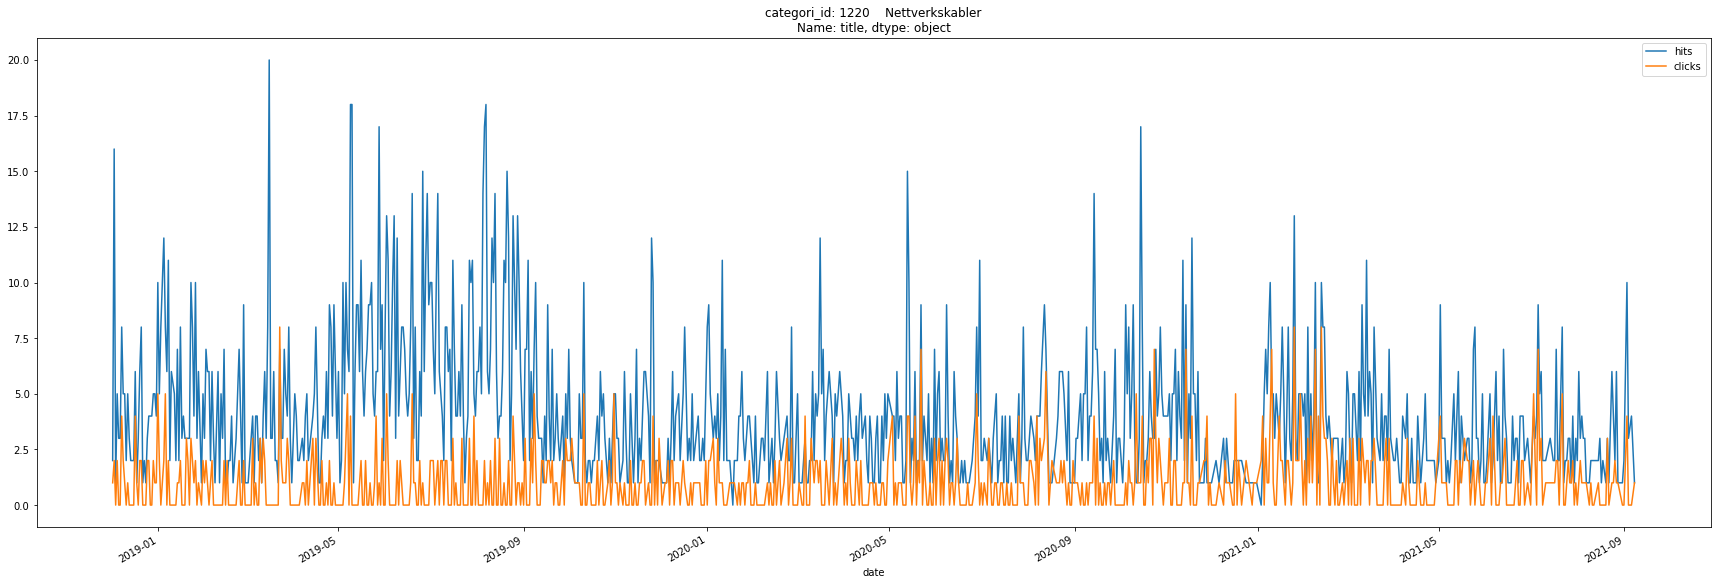

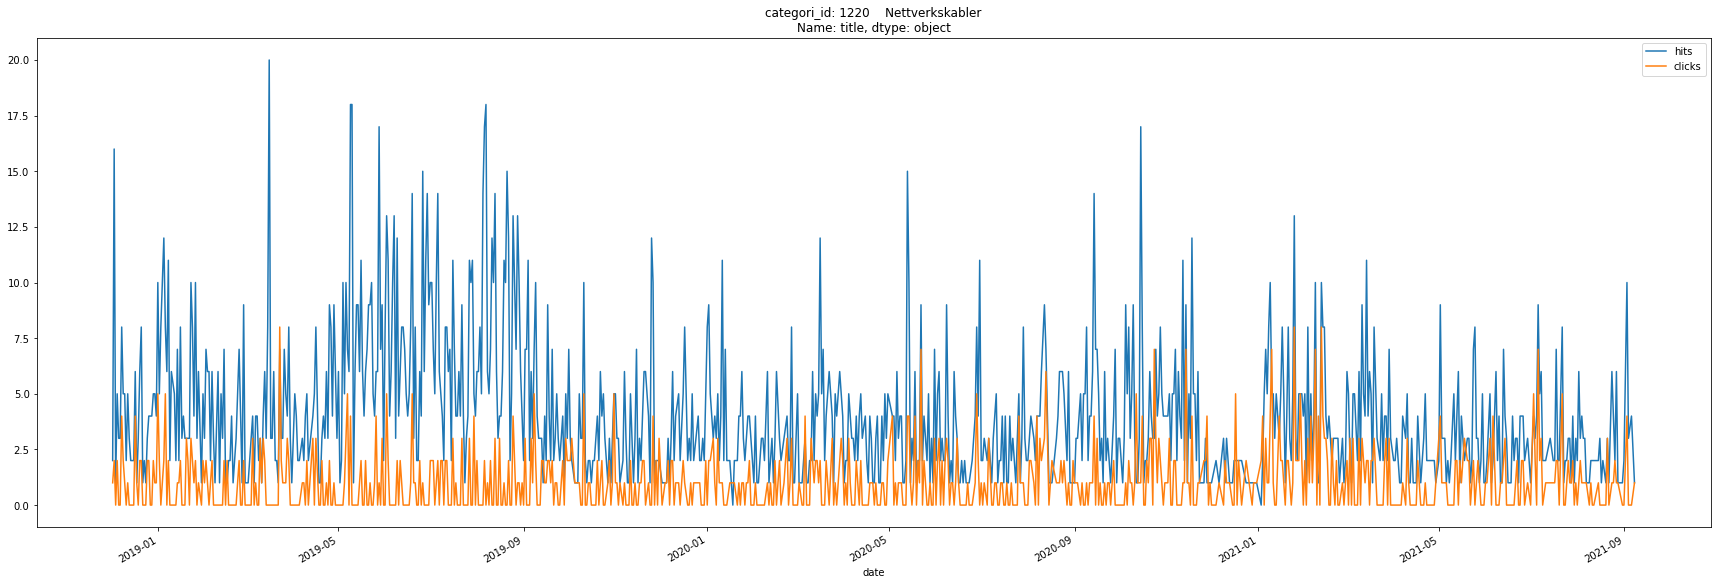

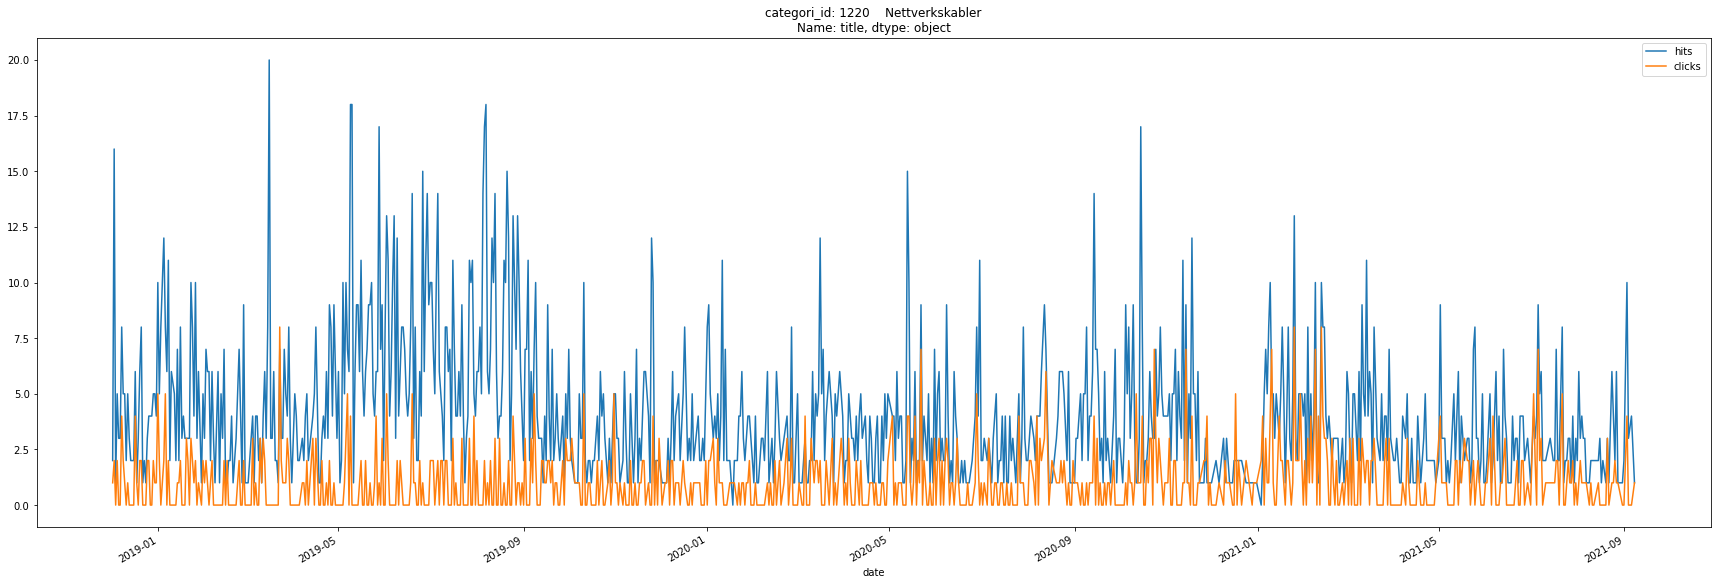

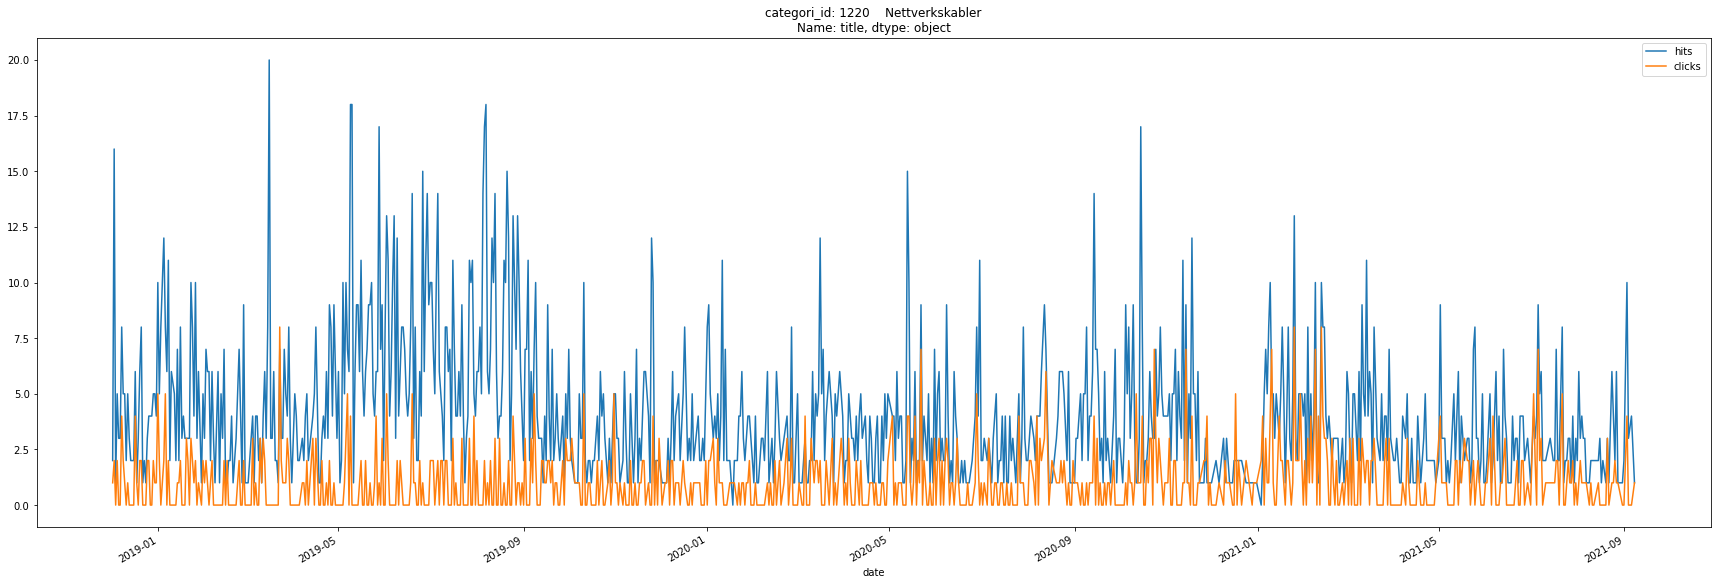

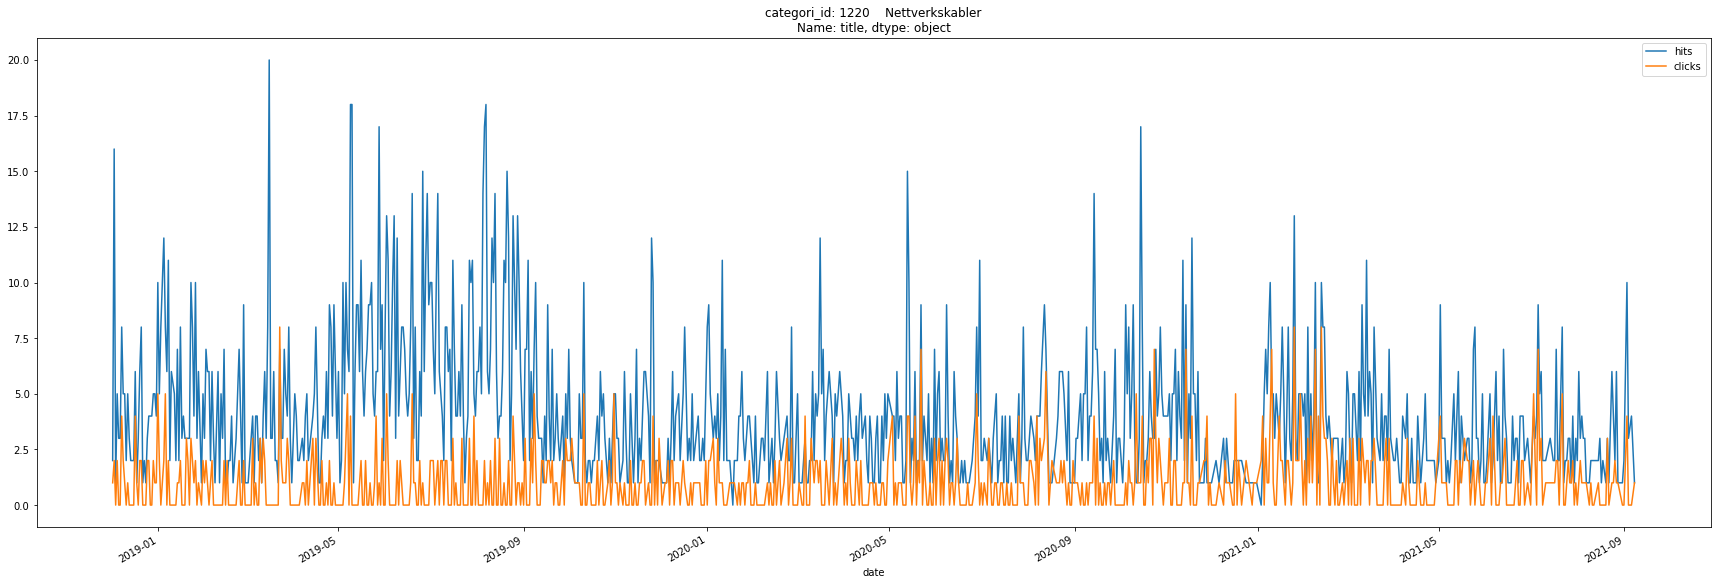

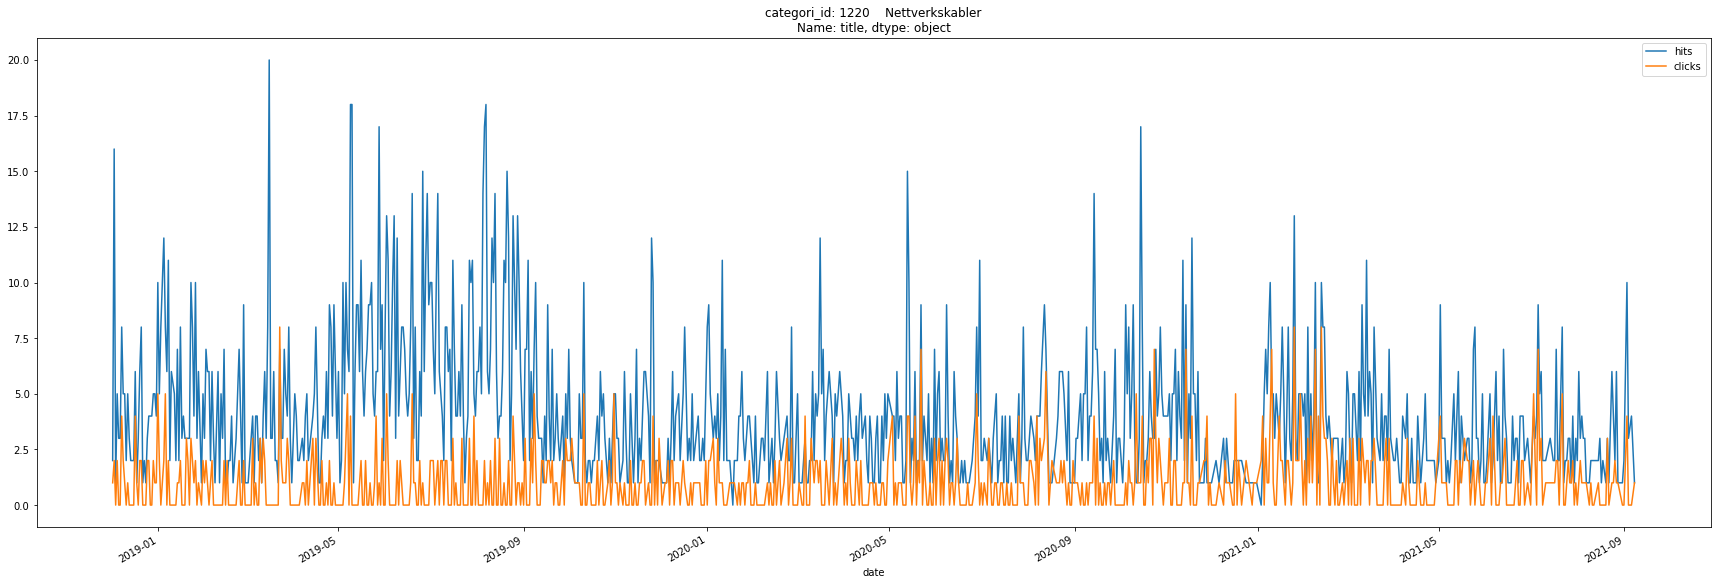

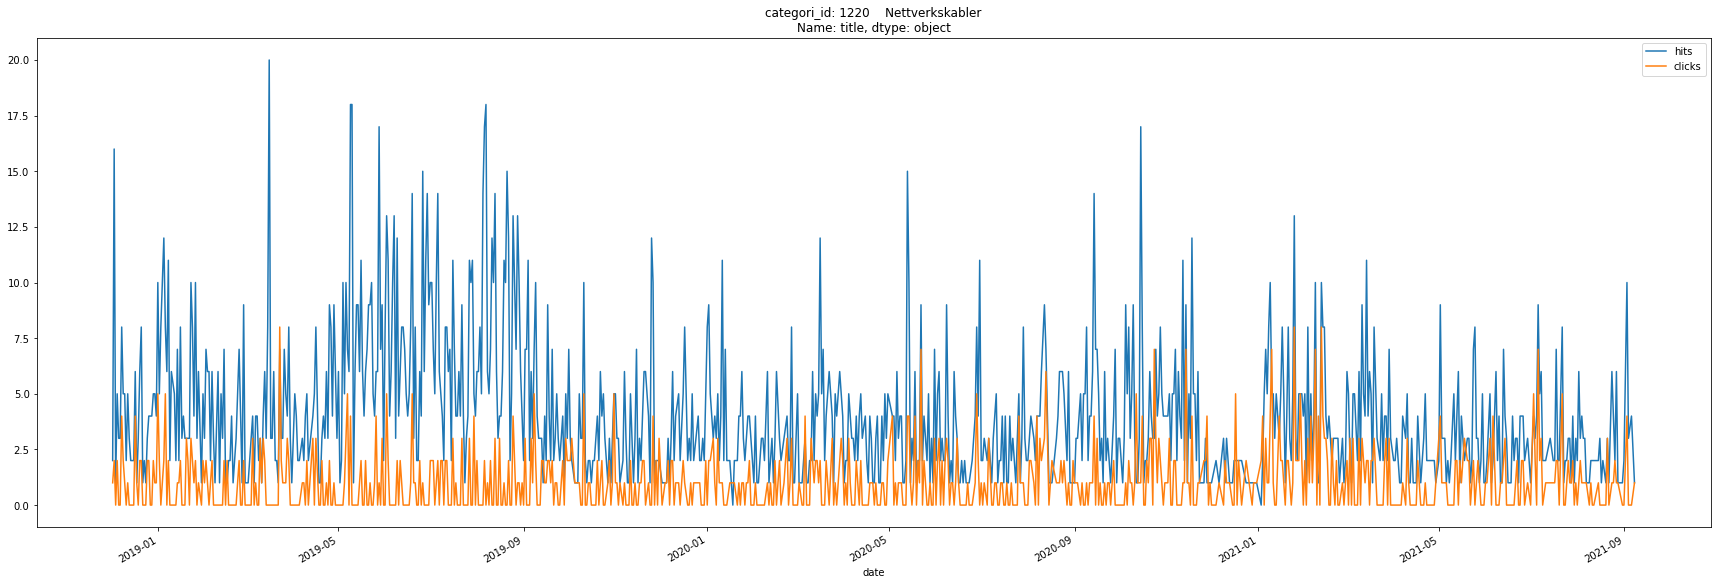

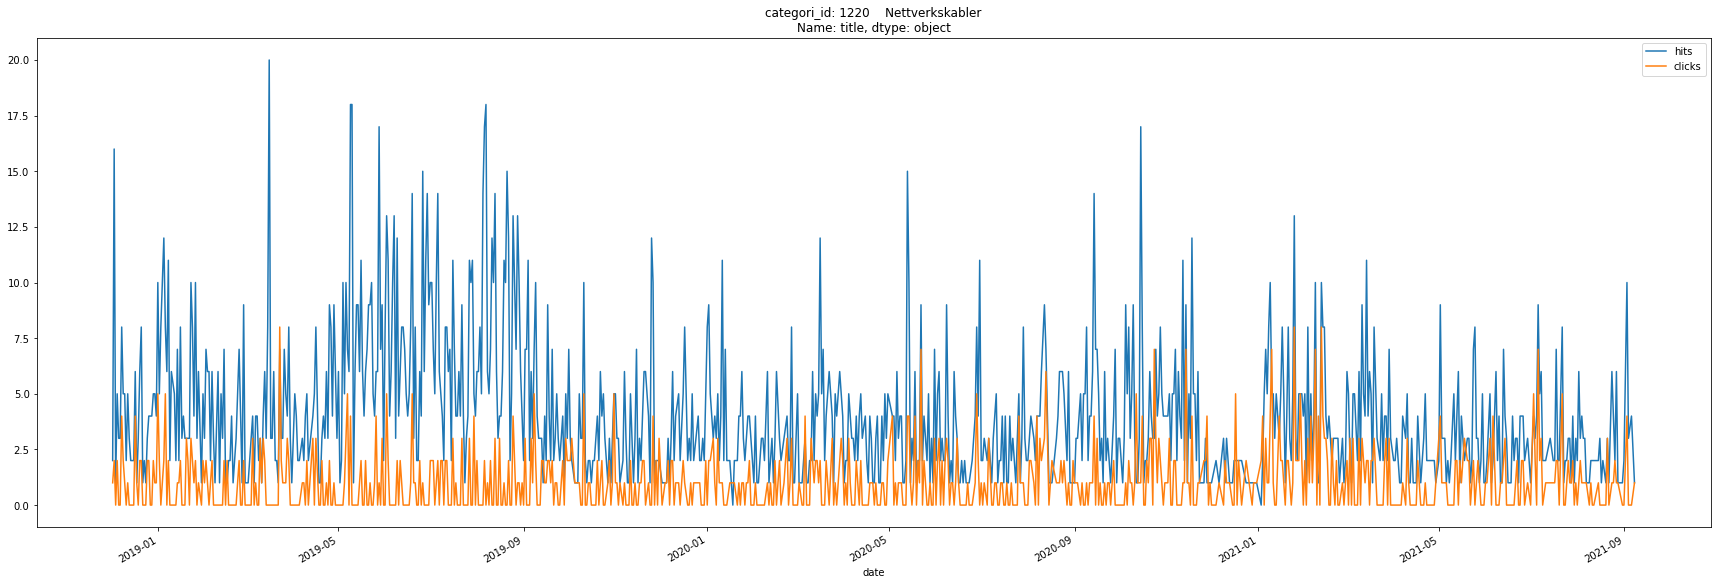

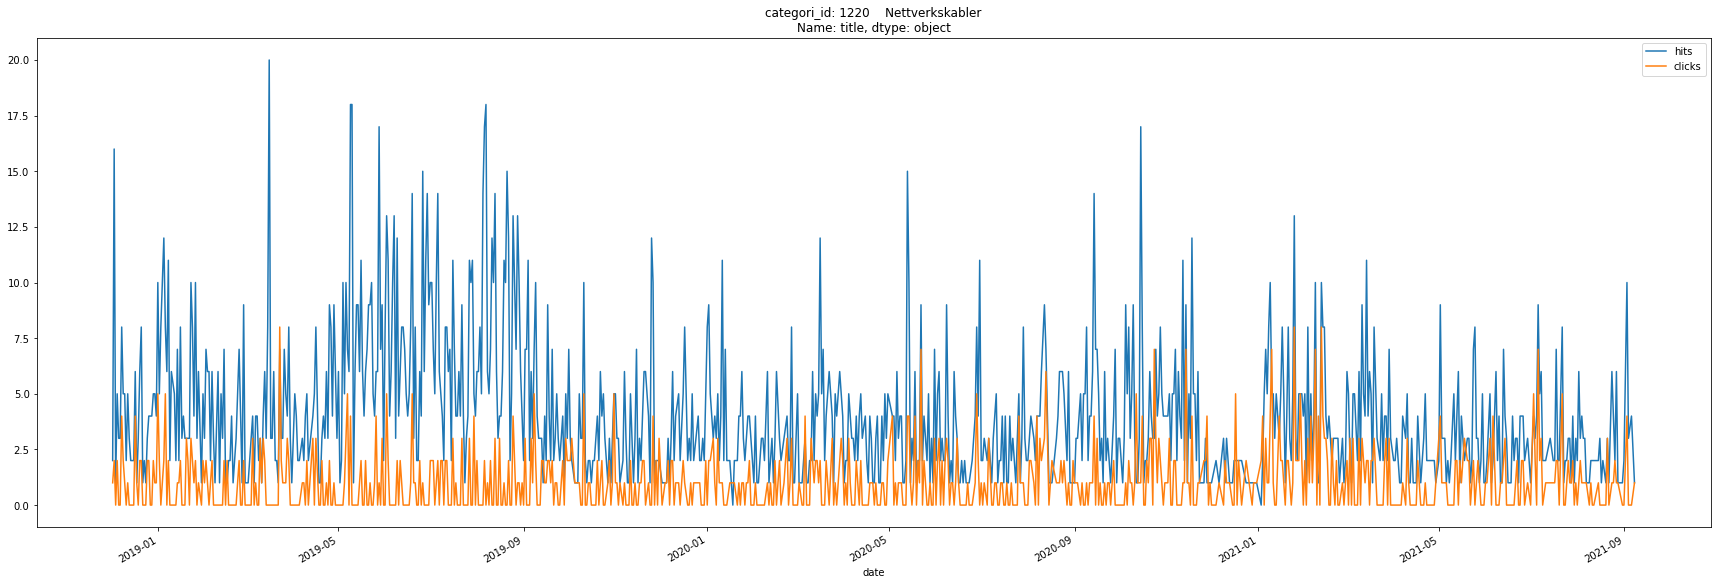

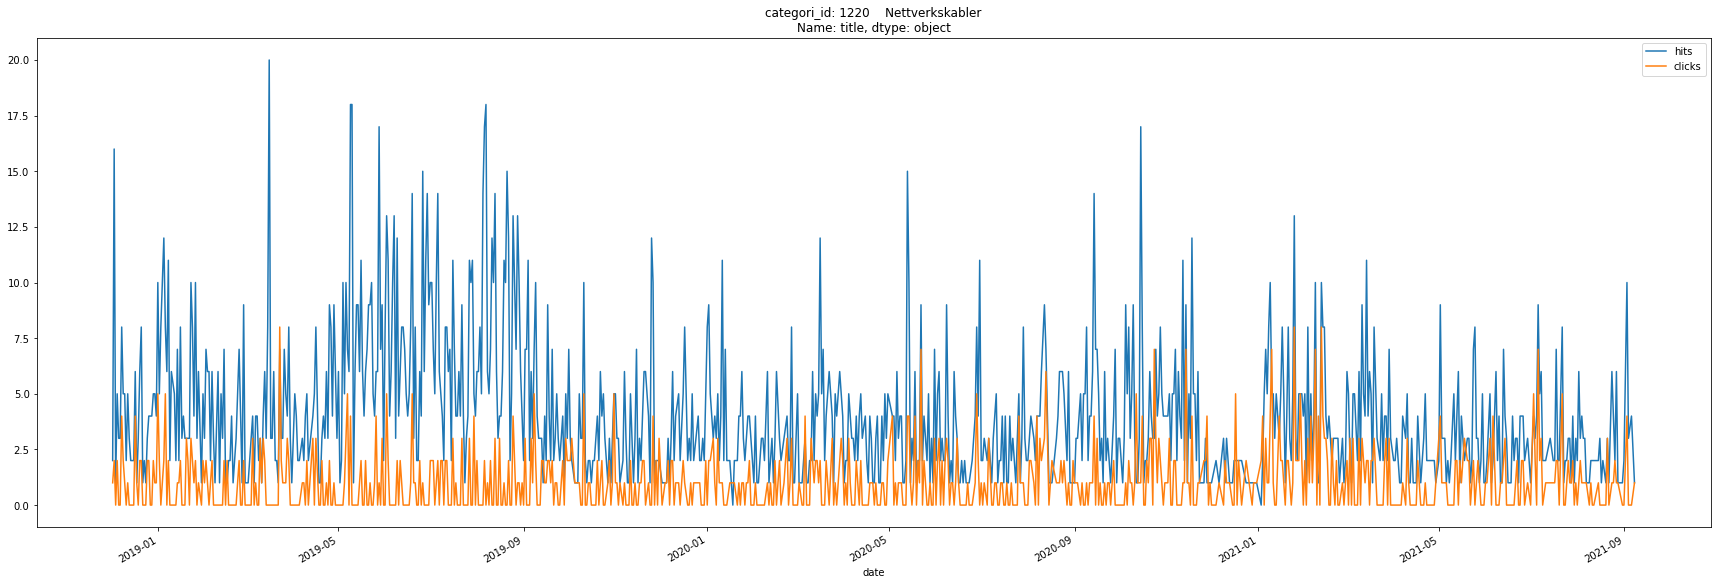

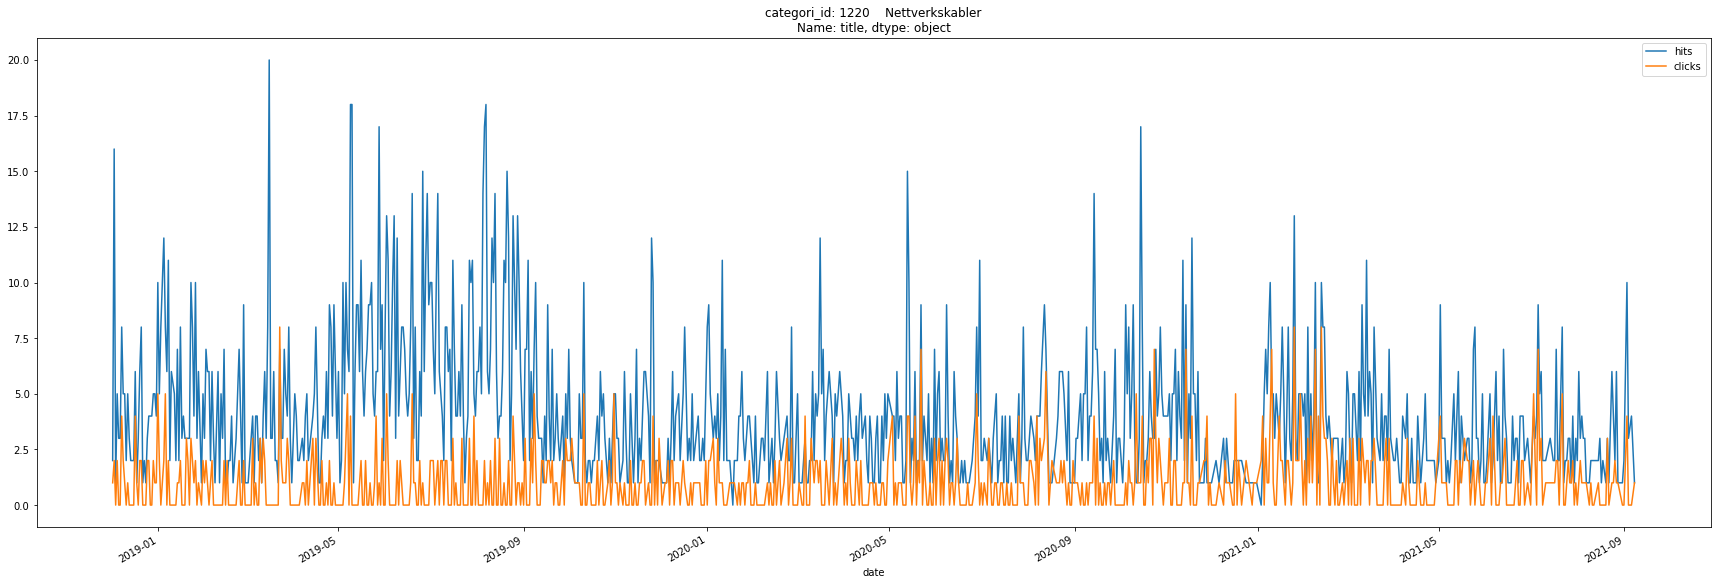

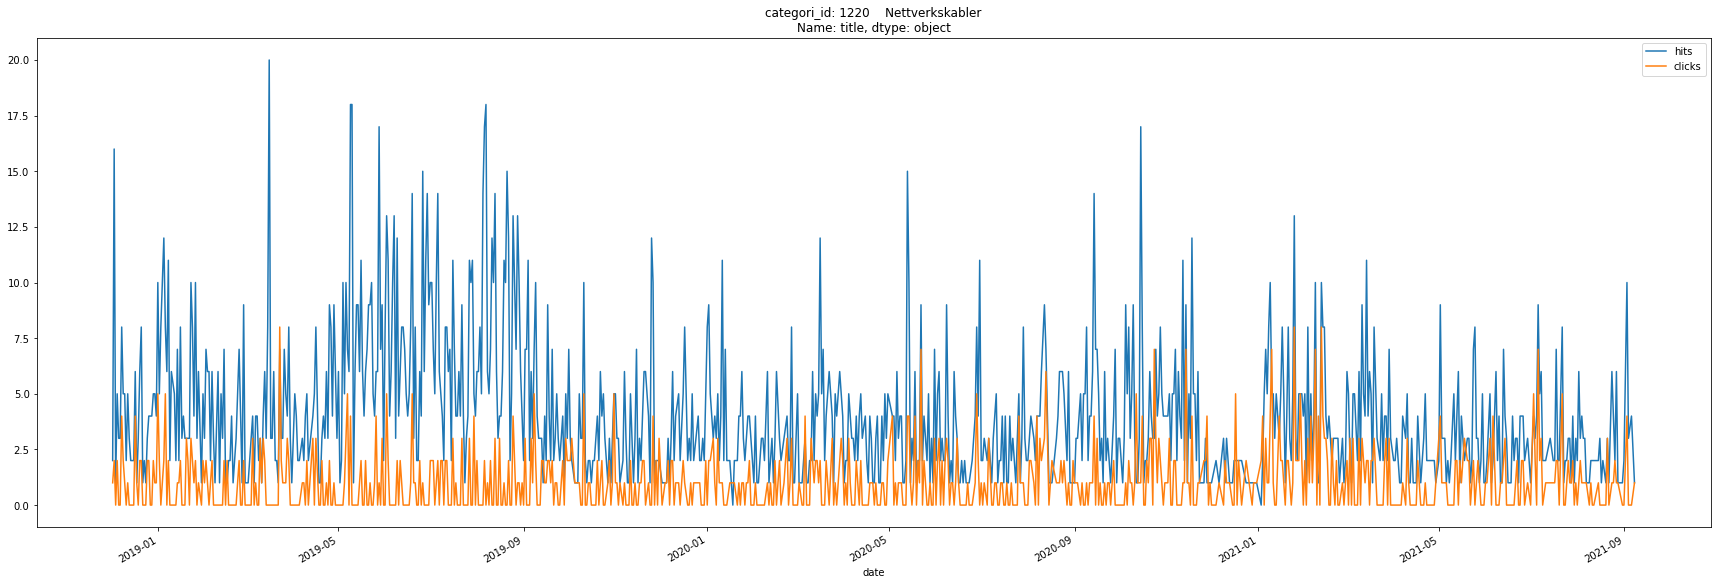

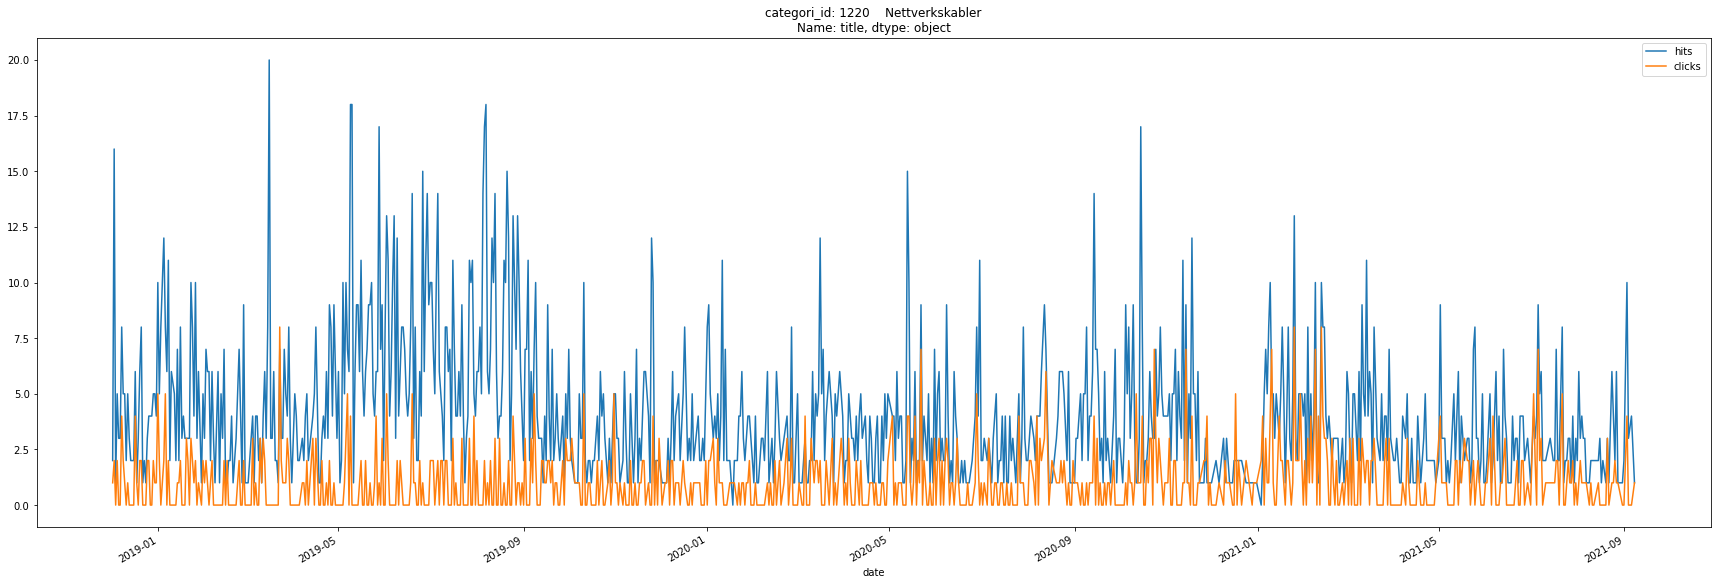

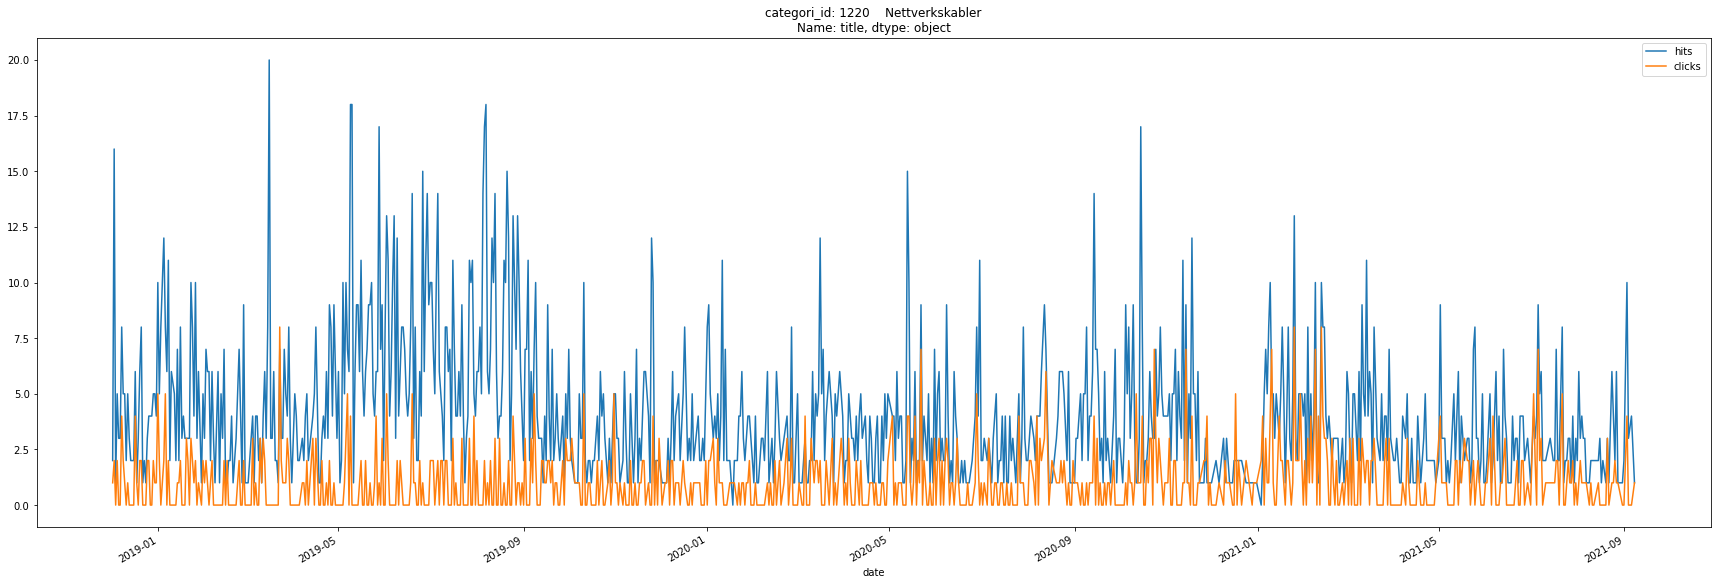

In [8]:
import matplotlib.dates as mdate
date_locator = mdate.MonthLocator()
formatter = mdate.DateFormatter("%Y-%m")
all_categories = data["cat_id"].tolist()
for cat in all_categories[:15]:
    cat_name = categories.loc[categories["internal_doc_id"] == cat]["title"]
    grouped[grouped["cat_id"] == cat].plot(
        x="date", 
        y=["hits", "clicks"], 
        title=f"categori_id: {cat_name}", 
        figsize=(30, 10),
        )#.xaxis.set_major_locator(date_locator)
#grouped.plot(x="date", y=["hits", "clicks"],)
#interesting_data.plot()

<AxesSubplot:title={'center':'categori: Turmat'}, xlabel='date'>

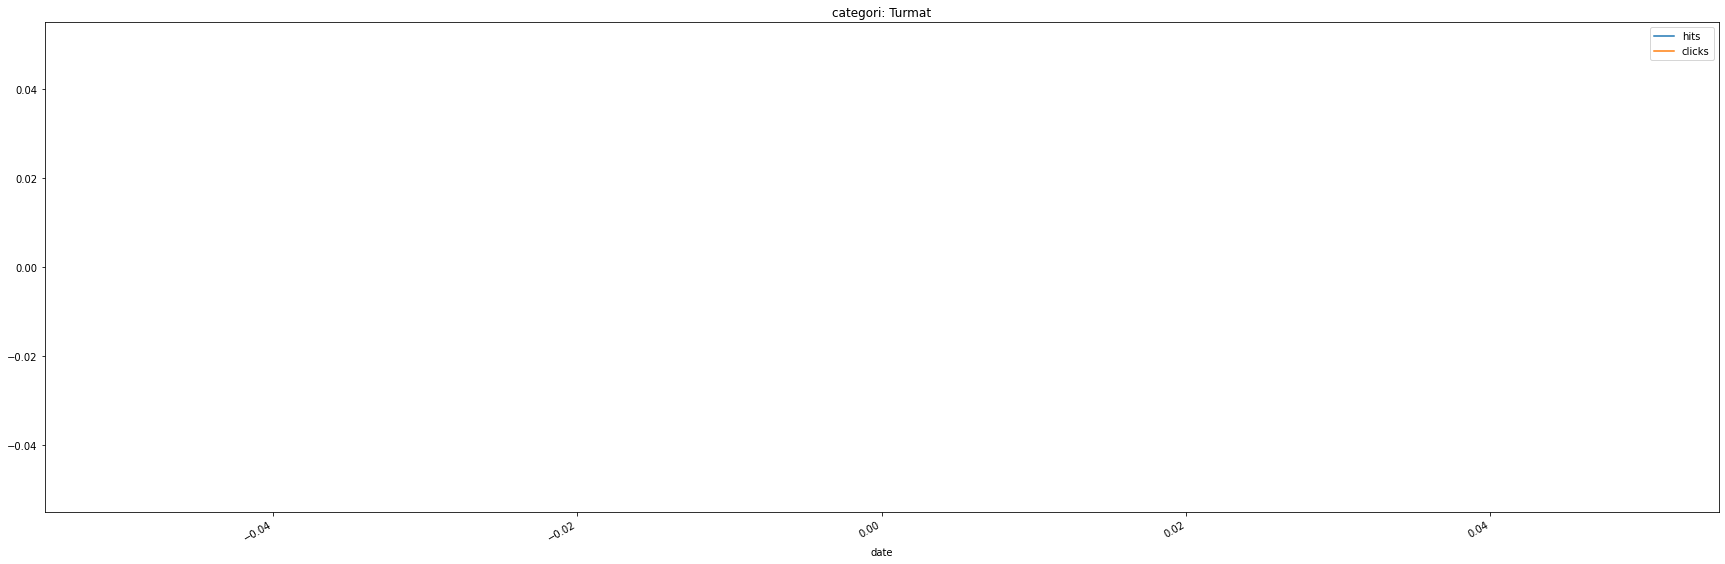

In [9]:
turmat = grouped[grouped["cat_id"] == 11488]
turmat.head()
name = categories.loc[categories["internal_doc_id"] == 11488]
name.head()
turmat.plot(
        x="date", 
        y=["hits", "clicks"], 
        title=f"categori: Turmat", 
        figsize=(30, 10),)

<AxesSubplot:title={'center':'categori: Våpenskap'}, xlabel='date'>

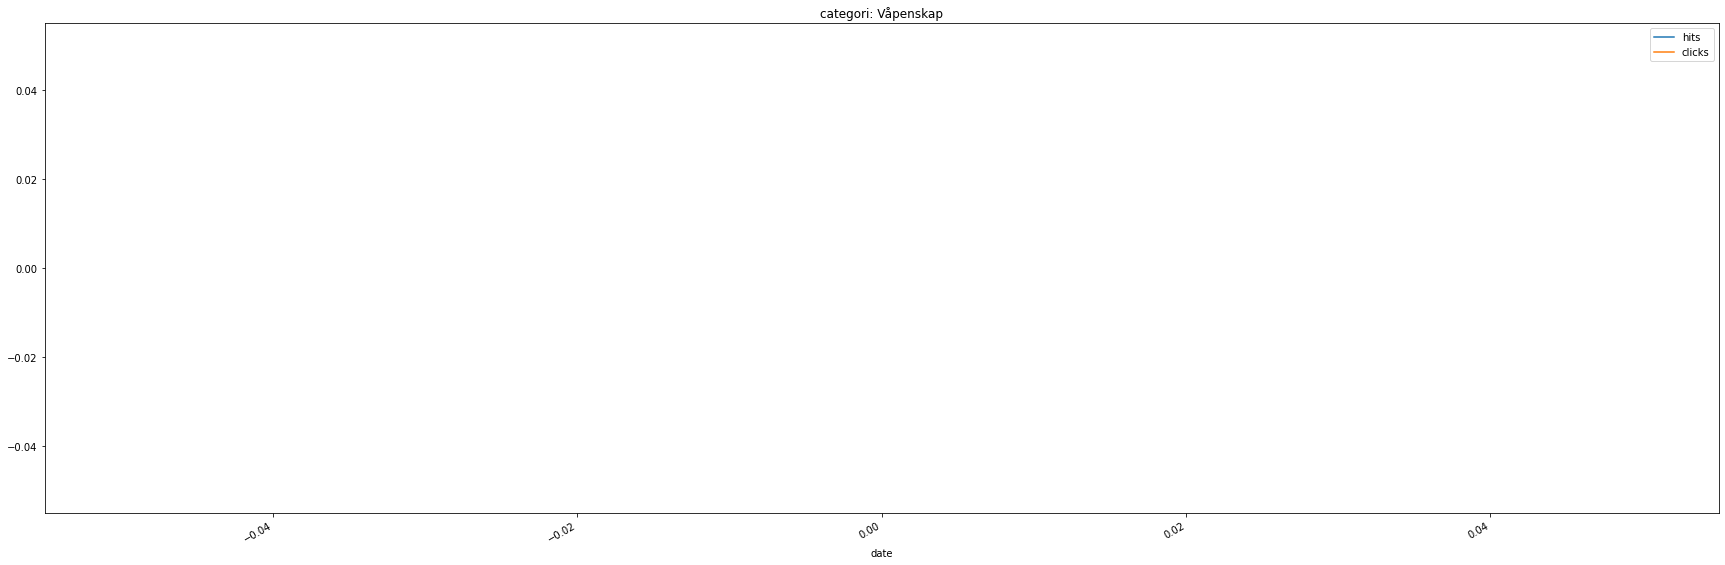

In [10]:
vapenskap = grouped[grouped["cat_id"] == 12738]
vapenskap.head()
name = categories.loc[categories["internal_doc_id"] == 12738]
name.head()
vapenskap.plot(
        x="date", 
        y=["hits", "clicks"], 
        title=f"categori: Våpenskap", 
        figsize=(30, 10),)

<AxesSubplot:title={'center':'categori: Kopp og krus'}, xlabel='date'>

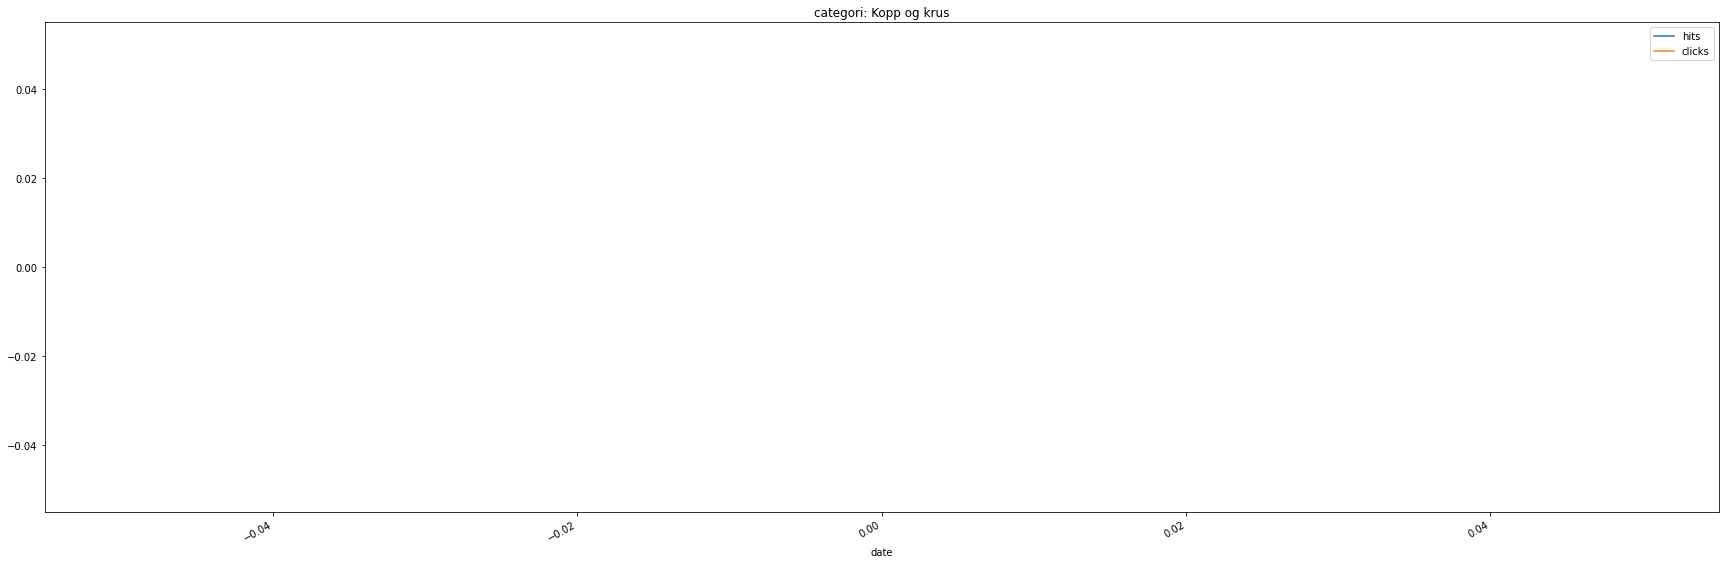

In [11]:
kopp_og_krus = grouped[grouped["cat_id"] == 12663]
kopp_og_krus.head()
name = categories.loc[categories["internal_doc_id"] == 12663]
name.head()
kopp_og_krus.plot(
        x="date", 
        y=["hits", "clicks"], 
        title=f"categori: Kopp og krus", 
        figsize=(30, 10),)


Det virker ikke som om det er data på kopper og krus. Dette burde undersøkes nærmere. Forhåpentligvis finnes dataen, men den er ikke hentet ut og sendt til oss.

<AxesSubplot:title={'center':'categori: Hengekøye'}, xlabel='date'>

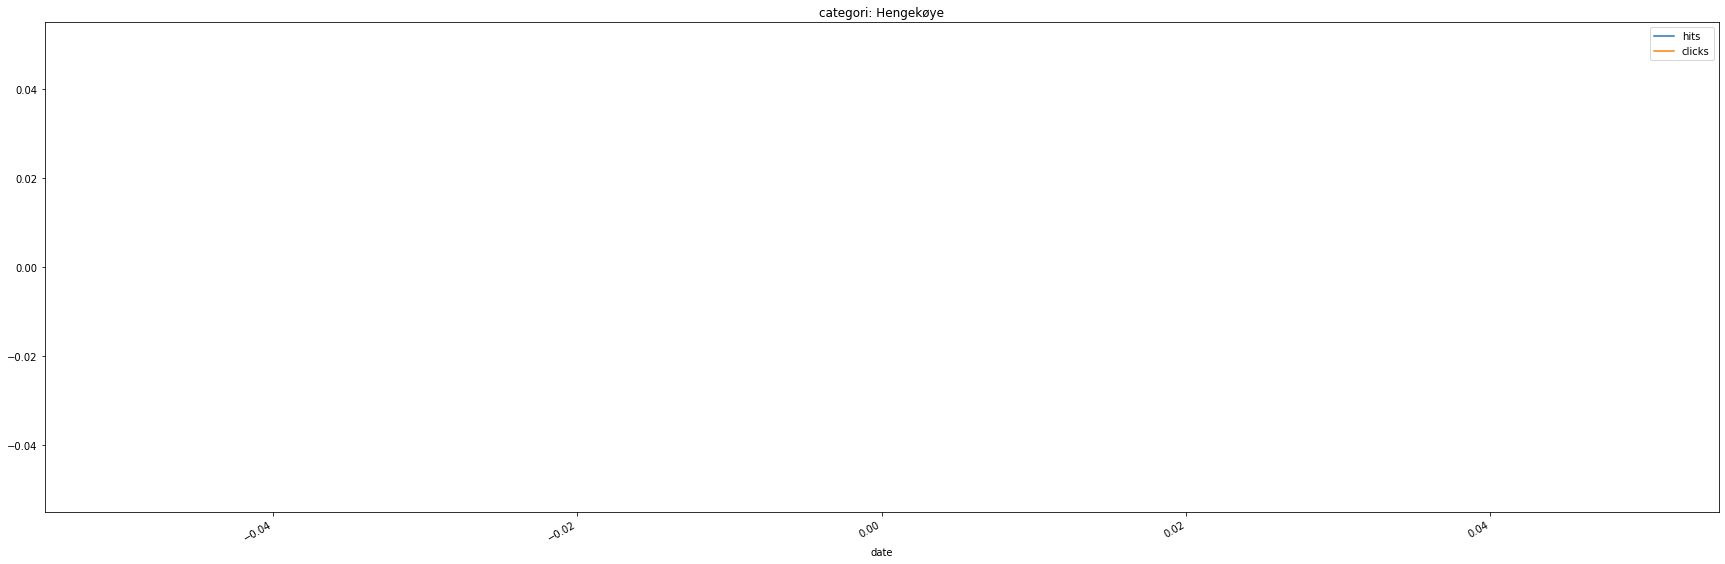

In [12]:
hengekøye = grouped[grouped["cat_id"] == 11514]
hengekøye.head()
name = categories.loc[categories["internal_doc_id"] == 11514]
name.head()
hengekøye.plot(
        x="date", 
        y=["hits", "clicks"], 
        title=f"categori: Hengekøye", 
        figsize=(30, 10),)

<AxesSubplot:title={'center':'categori: Hengekøye'}, xlabel='date'>

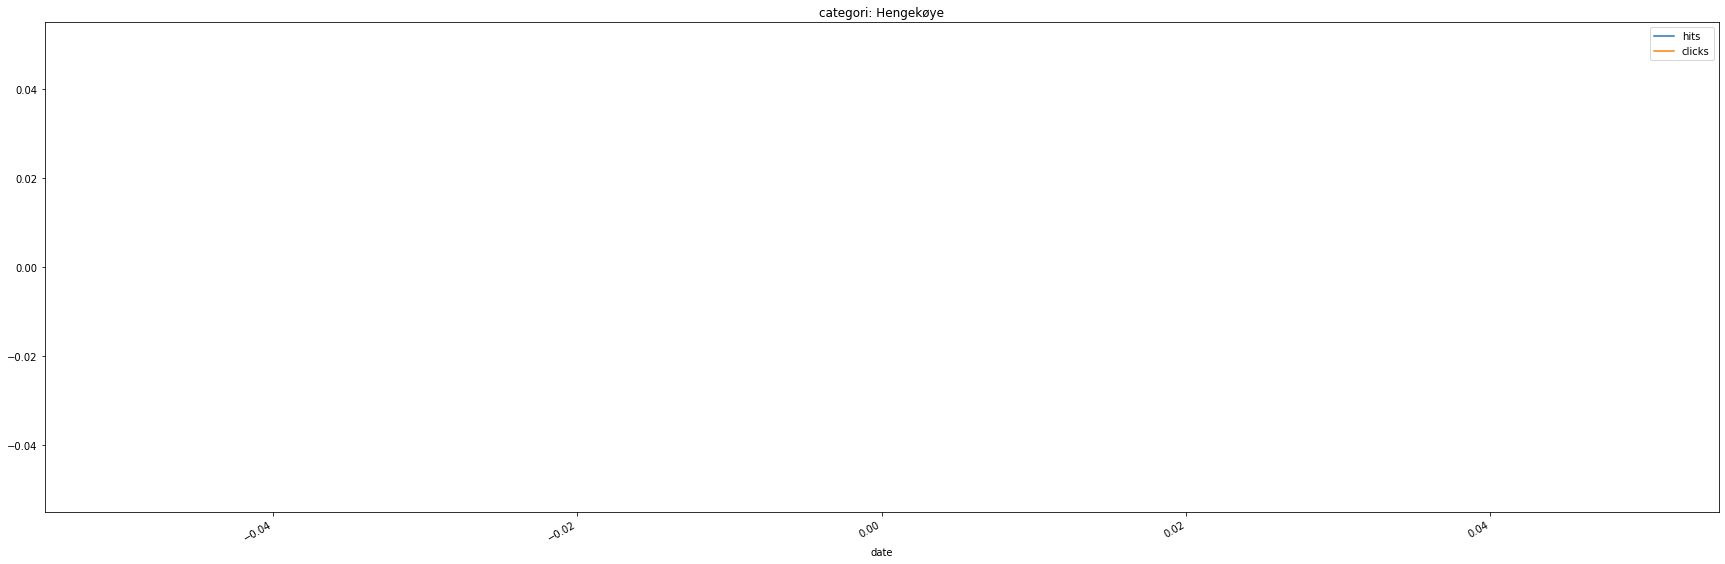

In [13]:
gpu = grouped[grouped["cat_id"] == 30]
gpu.head()
name = categories.loc[categories["internal_doc_id"] == 30]
name.head()
gpu.plot(
        x="date", 
        y=["hits", "clicks"], 
        title=f"categori: Hengekøye", 
        figsize=(30, 10),)

[[1.         0.36058553]
 [0.36058553 1.        ]]


<AxesSubplot:>

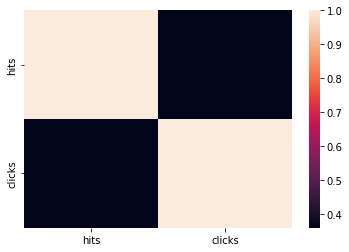

In [14]:
import numpy as np
name.head()
import seaborn as sns
print(np.corrcoef(data["hits"], data["clicks"]))
correlation_matrix = data[["hits", "clicks"]].corr()
sns.heatmap(correlation_matrix)

Høy korrelasjon mellom hits og klicks!

In [15]:
data.describe()

id  product_id  manufacturer_id  cat_id  root_cat_id  hits  clicks
count     2251        2251             2251    2251         2251  2251    2251
mean  18075873      256299             2943   11272         2170     3       1
std   10207491       84114             3530    1327         4447     5       2
min     280574      211757              722      33          101     0       0
25%    9289870      211757              722   11091          101     1       0
50%   18535411      213048              722   11573          101     2       0
75%   27154100      241400             8071   11573          128     4       1
max   35237122      434923             9231   11573        11748   104      49

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2251 entries, 0 to 2250
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               2251 non-null   int64         
 1   product_id       2251 non-null   int64         
 2   manufacturer_id  2251 non-null   int64         
 3   cat_id           2251 non-null   int64         
 4   root_cat_id      2251 non-null   int64         
 5   date             2251 non-null   datetime64[ns]
 6   hits             2251 non-null   int64         
 7   clicks           2251 non-null   int64         
 8   last_modified    2251 non-null   object        
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 158.4+ KB


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'product_id'}>,
        <AxesSubplot:title={'center':'manufacturer_id'}>],
       [<AxesSubplot:title={'center':'cat_id'}>,
        <AxesSubplot:title={'center':'root_cat_id'}>,
        <AxesSubplot:title={'center':'hits'}>],
       [<AxesSubplot:title={'center':'clicks'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

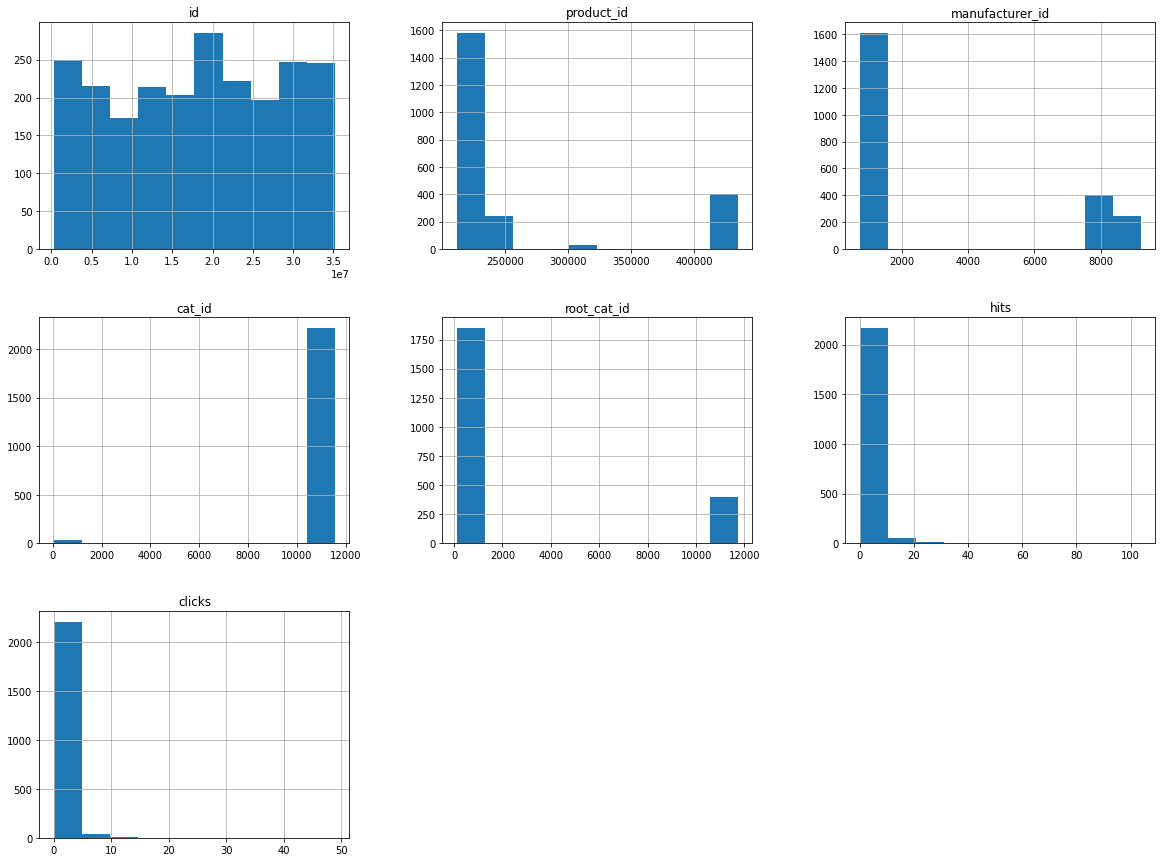

In [17]:
data.hist(figsize=(20,15))

På de to siste grafene ser vi at de aller fleste dagene så har vi 0 clicks og hits.
Noen veldig få dager har vi 1 click / hit og enda færre dager har vi flere.